In [2]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

In [3]:
df = pd.read_csv(path.join('data', 'Monthly gasoline demand Ontario gallon millions 1960  1975.csv'), index_col=0)

In [4]:
df.describe()

,x
count,192.000000
mean,162063.682292
std,41661.872770
min,86890.000000
25%,128425.500000
50%,157459.000000
75%,193555.750000
max,255918.000000


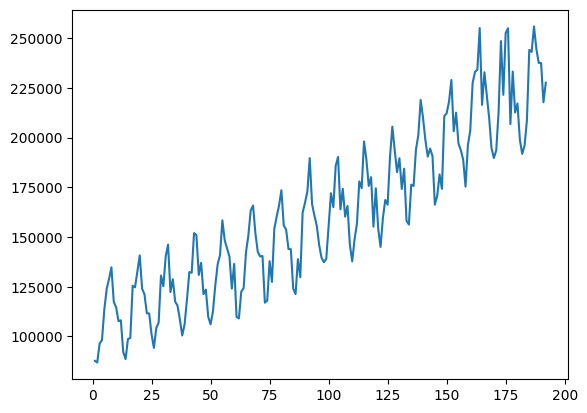

In [5]:
plt.plot(df["x"])

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
# Проверка временного ряда на стационарность

alpha = 0.05
name = "Спрос на миллионы галлонов"

# определяем временной ряд отдельной переменной
ts = df["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
# определяем результат значения теста из библиотеки с учетом
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Спрос на миллионы галлонов :
Test Statistic                   0.584705
p-value                          0.987232
#Lags Used                      15.000000
Number of Observations Used    176.000000
Critical Value (1%)             -3.468062
Critical Value (5%)             -2.878106
Critical Value (10%)            -2.575602
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


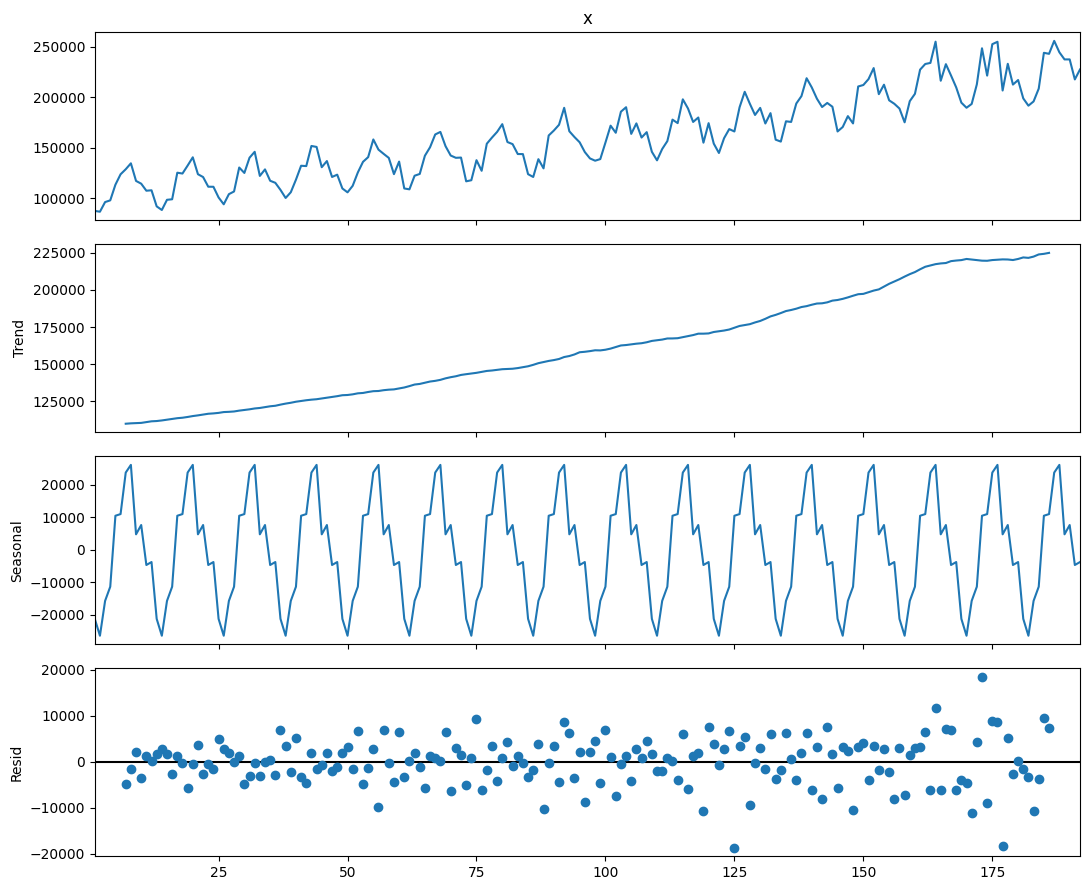

In [8]:
# Декомпозиция временного ряда

from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


# применяем функцию к данным о перевозках
decompose = seasonal_decompose(df["x"], 
                               period=12)
decompose.plot()
plt.show()

Создадим два временных ряда на основе имеющегося, только без тренда и сезонности.

Удаляем тренд согласно формуле: $y' = y_t - y_{t-1}$;

Удаляем сезонность согласно формуле: $y' = y_t - y_{t-s}$;

In [9]:
nottrend = []
s = 12
notseason = []

ts = df["x"].to_numpy()

# Набор данных без тренда
for i in range(1, len(ts)):
   nottrend.append(ts[i] - ts[i-1])

# Набор данных без сезонности
for i in range(s, len(ts)):
   notseason.append(ts[i] - ts[i-s])


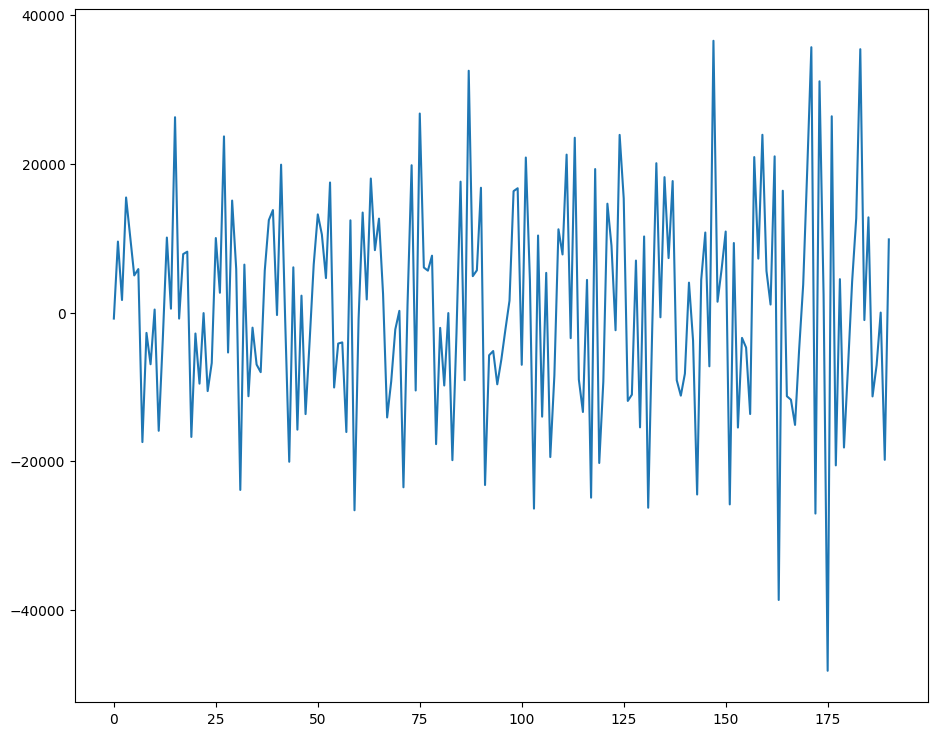

In [10]:
# отрисовываем временной ряд без тренда
plt.plot(nottrend)

In [11]:
alpha = 0.05
name = "Спрос на миллионы галлонов без тренда"
 
ts = nottrend

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Спрос на миллионы галлонов без тренда :
Test Statistic                  -3.381739
p-value                          0.011597
#Lags Used                      14.000000
Number of Observations Used    176.000000
Critical Value (1%)             -3.468062
Critical Value (5%)             -2.878106
Critical Value (10%)            -2.575602
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


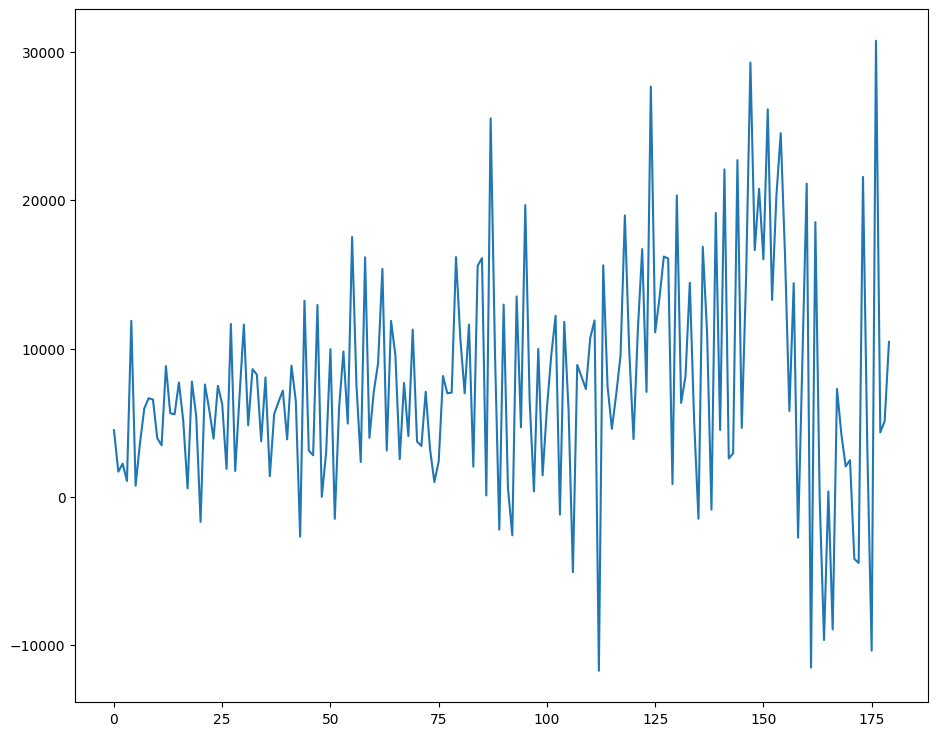

In [12]:
# отрисовываем временной ряд без сезонности
plt.plot(notseason)

In [13]:
alpha = 0.05
name = "Спрос на миллионы галлонов без тренда"
 
ts = notseason

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Спрос на миллионы галлонов без тренда :
Test Statistic                  -2.747624
p-value                          0.066154
#Lags Used                      14.000000
Number of Observations Used    165.000000
Critical Value (1%)             -3.470616
Critical Value (5%)             -2.879221
Critical Value (10%)            -2.576197
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


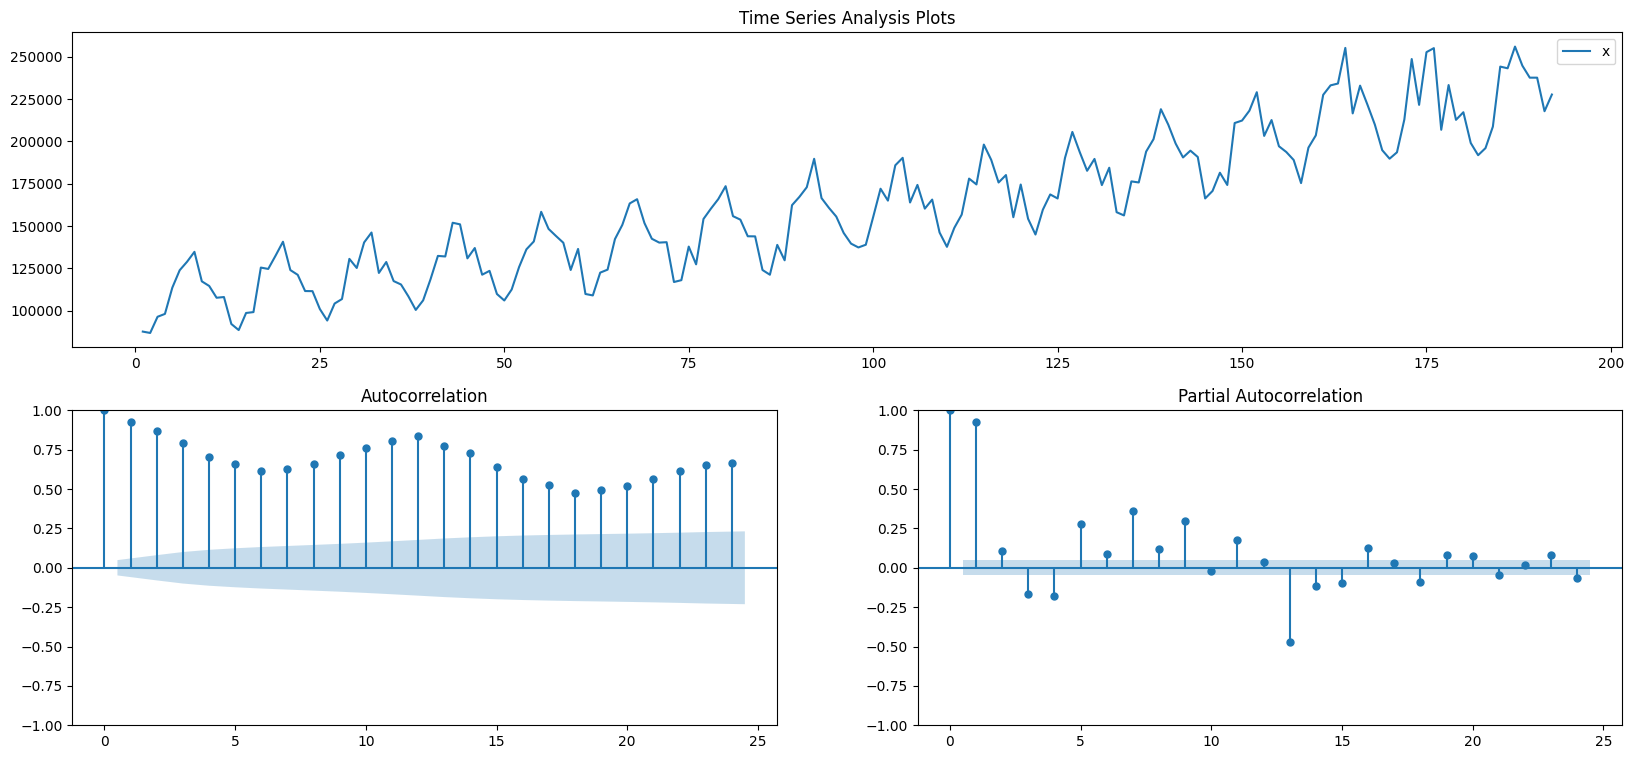

In [14]:
ts = pd.DataFrame(df["x"])

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=24, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=24, ax=pacf_ax, alpha=0.5)
None

In [15]:
df = pd.read_csv(path.join('data', 'Monthly gasoline demand Ontario gallon millions 1960  1975.csv'), index_col=0)
df.index = df.index - 1

df['t'] = df.index.values

ln = len(df)

# указываем 'объемы' выборок
train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

# делим выборки
train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

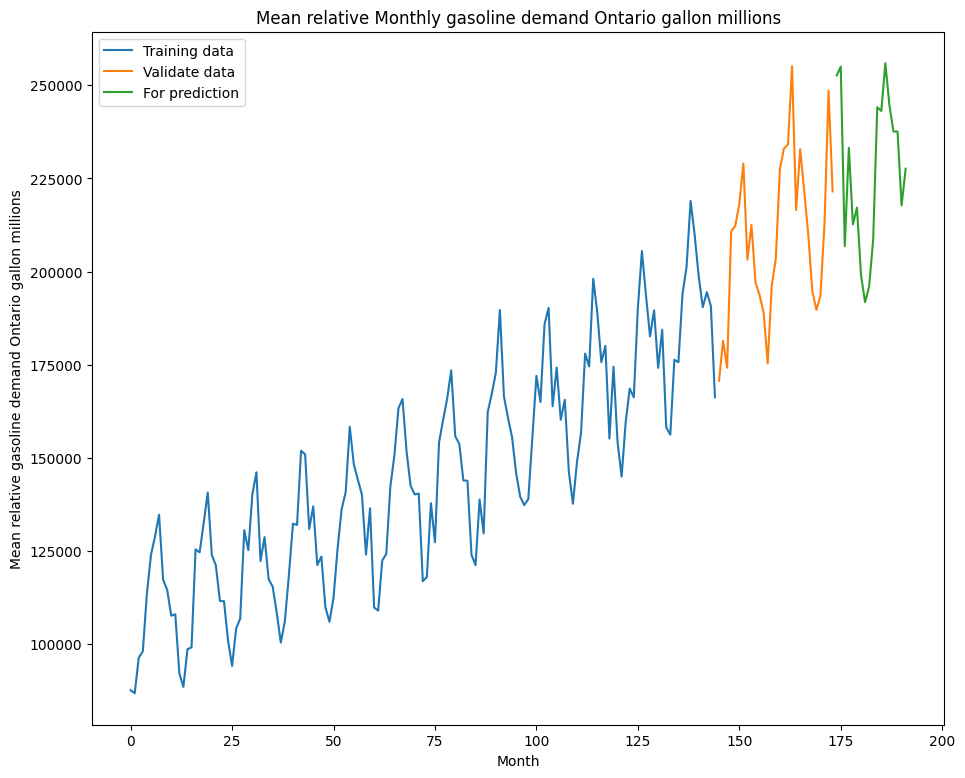

In [16]:
plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.legend()
plt.title('Mean relative Monthly gasoline demand Ontario gallon millions')
plt.ylabel('Mean relative gasoline demand Ontario gallon millions')
plt.xlabel('Month')
plt.show()

In [17]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [18]:
# создаем объект модели на основе данных временного ряда с 3 лагами
model = AutoReg(df.x, 24, old_names=False)

# обучаем
res = model.fit()

# выводим сводку информации об авторегрессионной модели
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  192
Model:                    AutoReg(24)   Log Likelihood               -1673.972
Method:               Conditional MLE   S.D. of innovations           5141.921
Date:                Fri, 08 Mar 2024   AIC                           3399.944
Time:                        15:17:58   BIC                           3481.168
Sample:                            24   HQIC                          3432.909
                                  192                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        590.5851   1990.860      0.297      0.767   -3311.429    4492.599
x.L1          -0.1680      0.075     -2.235      0.025      -0.315      -0.021
x.L2           0.1130      0.071      1.601      0.1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


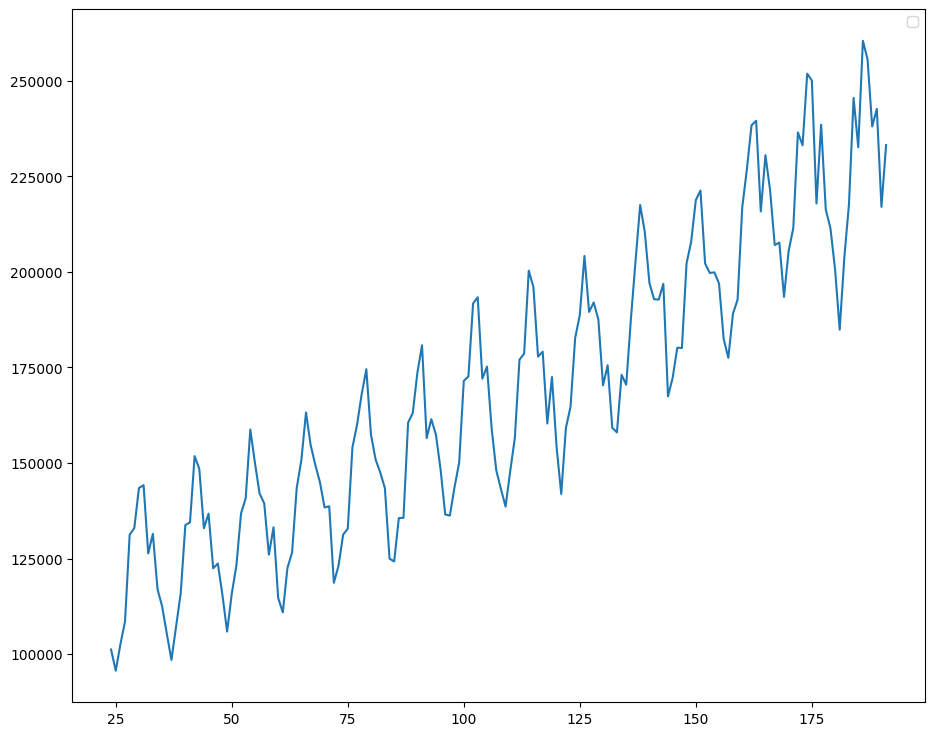

In [19]:
fig = res.plot_predict(0)

In [20]:
pred = res.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff+1, end=(validate_cutoff), dynamic=False)
f_pred = res.predict(start=validate_cutoff + 1, end=(forecast_df.t[len(df.t)-1]), dynamic=False)

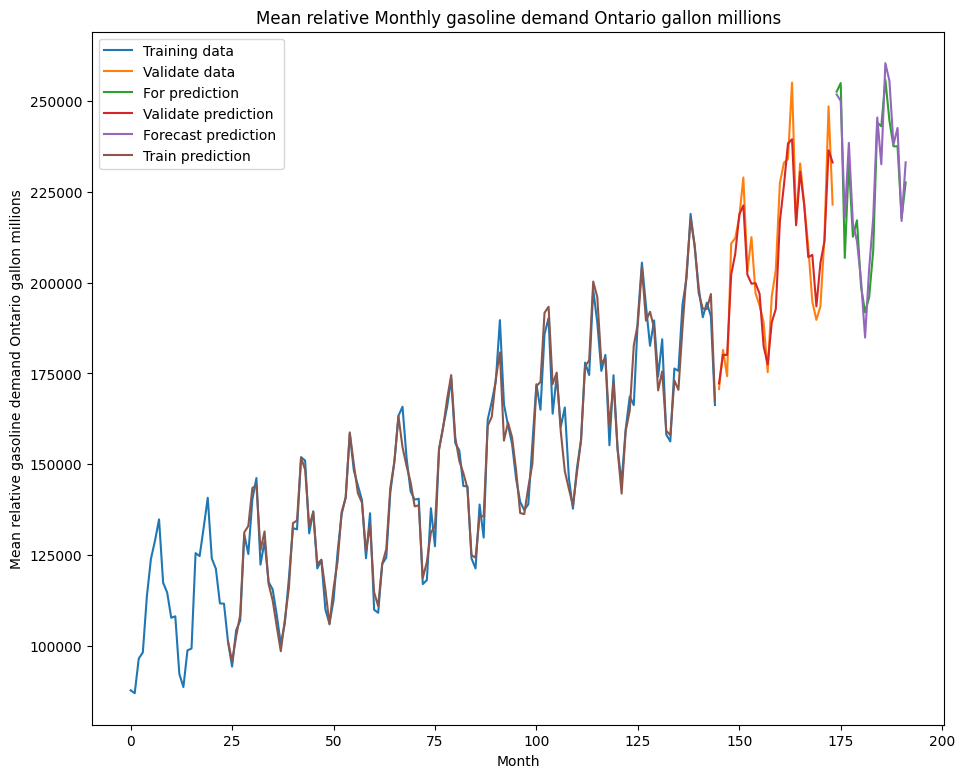

In [22]:
plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.plot(validate_df.t, v_pred, label='Validate prediction ')
plt.plot(forecast_df.t, f_pred, label='Forecast prediction')
plt.plot(train_df.t, pred, label='Train prediction')

plt.legend()
plt.title('Mean relative Monthly gasoline demand Ontario gallon millions')
plt.ylabel('Mean relative gasoline demand Ontario gallon millions')
plt.xlabel('Month')
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

In [24]:
def SMAPE(y_true, y_pred):
    num = np.abs(y_true - y_pred)
    den = (np.abs(y_true) + np.abs(y_pred)) / 2
    result = np.sum(num / den) * 100 / len(y_true)
    return result

In [25]:
print("RMSE:", np.sqrt(mean_squared_error(forecast_df.x, f_pred)))
print("MAPE:", mean_absolute_percentage_error(forecast_df.x, f_pred))
print("MAE:", mean_absolute_error(forecast_df.x, f_pred))
print("R2: ", r2_score(forecast_df.x, f_pred))
print("SMAPE", SMAPE(forecast_df.x, f_pred))

RMSE: 6347.230773912849
MAPE: 0.024041941210147483
MAE: 5344.446341359899
R2:  0.9035009730816962
SMAPE 2.387289473871852
